In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import seaborn.objects as so #para usar objetos

Luego de realizar una exploracion simple en todos los archivos csv, decidi hacer el EDA con los 5 dataset mas importantes:
- Historico Velocidad Internet
- Ingresos trimestrales por servicio de internet
- Penetracion del internet fijo (acceso por cada 100 hogares)
- Acceso a internet por tecnologia y provincia
-  Accesos a Internet por velocidad

Diccionario:

- Mbps("megabits por segundo"):Mide la velocidad de descarga y subida. Osea la cantidad de megabits capaz de enviar la conexión en un segundo.
- Dial-Up: son conexiones que se realizan a través de una llamada telefónica local utilizando un aparato denominado módem o modulador/demodulador. En este tipo de conexión el usuario abona los pulsos telefónicos consumidos y el servicio de acceso a Internet. 
- Wireless al tipo de comunicación en la que no se utiliza un medio de propagación físico, sino que se utiliza modulación de - das electromagnéticas, radiaciones o medios ópticos.
- cable módem es un tipo especial de módem diseñado para modular la señal de datos sobre una infraestructura de televisión por cable
- TELEFONIAFIJA= La telefonía fija o convencional es una infraestructura de telecomunicaciones diseñada para transferir señales acústicas a gran distancia por medio de señales eléctricas.

# Analisis Exploratorio

- Historico Velocidad Internet

In [2]:
velocidad_internet= pd.read_csv("./Datos/historico_velocidad_internet.csv")
velocidad_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     35 non-null     int64 
 1   Trimestre               35 non-null     int64 
 2   Mbps (Media de bajada)  35 non-null     object
 3   Trimestre.1             35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [3]:
#Tamaño
velocidad_internet.shape #35 filas y 4 columnas

(35, 4)

In [4]:
#Obtenemos estadisticas descriptivas.
velocidad_internet.describe()

,Año,Trimestre
count,35.000000,35.000000
mean,2017.885714,2.457143
std,2.564135,1.120474
min,2014.000000,1.000000
25%,2016.000000,1.500000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [5]:
#Vemos si hay valores faltantes
velocidad_internet.isnull().sum()

Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64

In [6]:
velocidad_internet.head(4)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,"62,46",Jul-Sept 2022
1,2022,2,"58,44",Abr-Jun 2022
2,2022,1,"55,11",Ene-Mar 2022
3,2021,4,"52,34",Oct-Dic 2021


In [7]:
#datos ordenados por año. (Inicio de carga:2014, fin:2022)
velocidad_internet.sort_values(['Año'], ascending=True, inplace=True)

In [8]:
# Limpio y convierto los valores de la columna 'Mbps' a tipo numérico
velocidad_internet['Mbps (Media de bajada)'] = velocidad_internet['Mbps (Media de bajada)'].str.replace(',', '.')
velocidad_internet['Mbps (Media de bajada)'] = pd.to_numeric(velocidad_internet['Mbps (Media de bajada)'])


In [9]:
velocidad_internet['Incremento acumulativo'] = velocidad_internet.groupby('Año')['Mbps (Media de bajada)'].cumsum()

In [14]:
#Relacion año-Mbps
suma_mbps_por_año = velocidad_internet.groupby('Año')['Mbps (Media de bajada)'].sum()
suma_mbps_por_año 

Año
2014     15.41
2015     18.68
2016     22.78
2017     34.13
2018     58.38
2019     90.15
2020    158.87
2021    189.54
2022    176.01
Name: Mbps (Media de bajada), dtype: float64

In [15]:
# Suma de 'Mbps' en el año 2014 y 2022
suma_2014 = 15.41
suma_2022 = 176.01

# Cálculo del porcentaje de cambio
porcentaje_cambio = ((suma_2022 - suma_2014) / suma_2014) * 100

print("Porcentaje de cambio en la capacidad de envío de Mbps en los 9 años: {:.2f}%".format(porcentaje_cambio))

Porcentaje de cambio en la capacidad de envío de Mbps en los 9 años: 1042.18%


In [40]:
velocidad_internet.to_csv('velocidad_internet.csv', index=False)

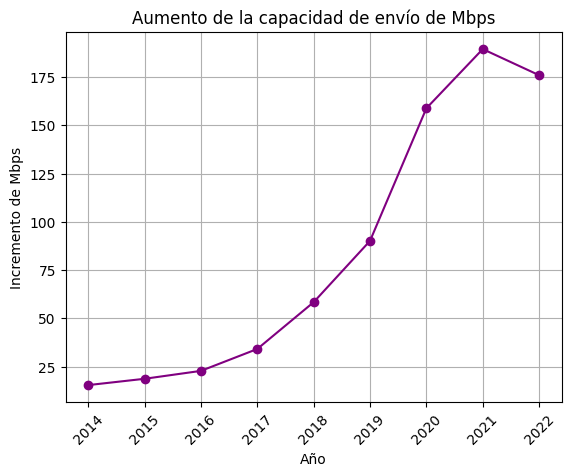

In [16]:
# Obtenemos los datos necesarios del DataFrame
años = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
incremento = [15.41, 18.68, 22.78, 34.13, 58.38, 90.15, 158.87, 189.54, 176.01]

# Configuramos el gráfico de línea
plt.plot(años, incremento, marker='o', color='purple')
plt.xlabel('Año')
plt.ylabel('Incremento de Mbps')
plt.title('Aumento de la capacidad de envío de Mbps')
plt.grid(True)

# Ajustamos las etiquetas del eje x
plt.xticks(rotation=45)

# Visualizacion
plt.show()

Podemos concluir que:
- En un lapso de 9 años, se logro aumentar en un 1042.18% la capacidad de enviar conexiones por segundo
- Para el historico, el año 2019 fue el mejor. Ya que logo aumentar la capacidad en un 76,22%. Cuando en el crecimiento anual ordinario es entre 19 y 40%

Con el fin de comparar los Mbps en los diferentes trimestres raelizare un grafico de barras

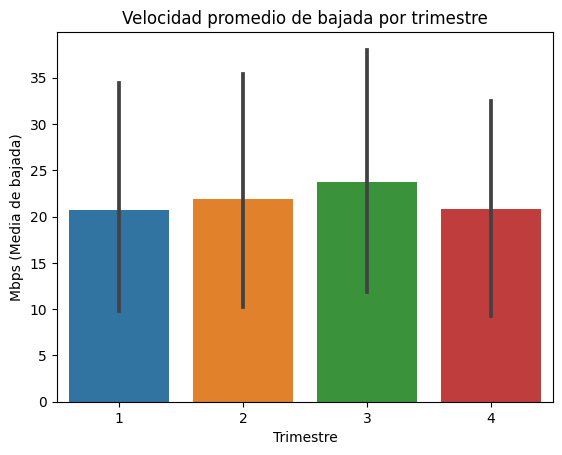

In [25]:
sns.barplot(x="Trimestre", y="Mbps (Media de bajada)", data=velocidad_internet)
plt.xlabel("Trimestre")
plt.ylabel("Mbps (Media de bajada)")
plt.title("Velocidad promedio de bajada por trimestre")
plt.show()

C:\Users\clari\AppData\Local\Temp\ipykernel_16420\3879000074.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=velocidad_internet, x='Año', y='Mbps (Media de bajada)', hue='Trimestre', ci=None, marker="o", palette='viridis')


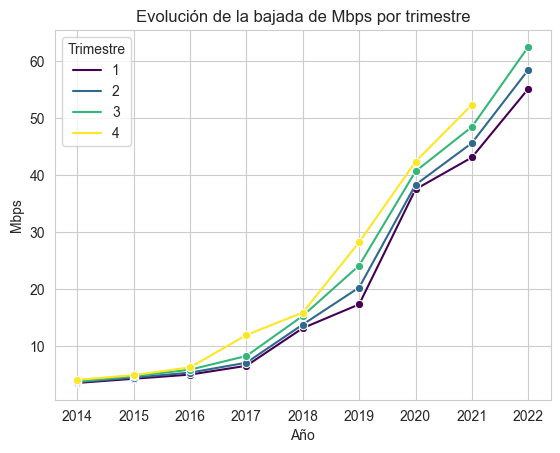

In [30]:
# Gráfico de área
sns.set_style("whitegrid")
sns.lineplot(data=velocidad_internet, x='Año', y='Mbps (Media de bajada)', hue='Trimestre', ci=None, marker="o", palette='viridis')

plt.xlabel('Año')
plt.ylabel('Mbps')
plt.title('Evolución de la bajada de Mbps por trimestre')
plt.show()

Podemos que a lo largo de los años fue aumentado la bajada de mbps. Y como trimestre a trimestre se supero la cantidad procesada!

- Ingresos trimestrales por servicio de internet

In [3]:
internet_ingresos=pd.read_csv("./Datos/Internet_Ingresos.csv")
internet_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [4]:
internet_ingresos.shape

(35, 4)

In [5]:
internet_ingresos.describe()

,Año,Trimestre
count,35.000000,35.000000
mean,2017.885714,2.457143
std,2.564135,1.120474
min,2014.000000,1.000000
25%,2016.000000,1.500000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [6]:
internet_ingresos.isnull().sum()#no tenemos datos nulos

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [7]:
internet_ingresos.head(5)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [8]:
# Limpio y convierto los valores de la columna 'Mbps' a tipo numérico
internet_ingresos['Ingresos (miles de pesos)'] = internet_ingresos['Ingresos (miles de pesos)'].str.replace('.', '')
internet_ingresos['Ingresos (miles de pesos)'] = pd.to_numeric(internet_ingresos['Ingresos (miles de pesos)'])

<Axes: xlabel='Trimestre', ylabel='Ingresos (miles de pesos)'>

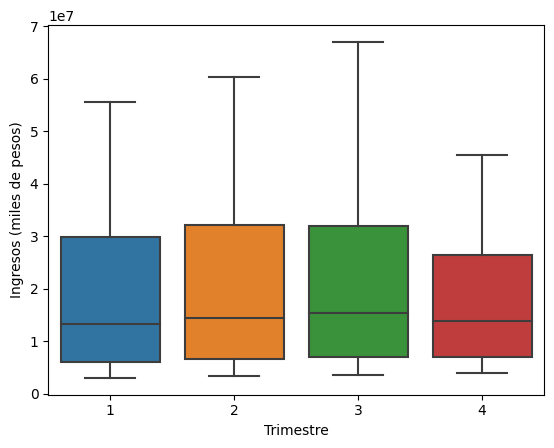

In [9]:
#Diagrama de cajas
sns.boxplot(data=internet_ingresos, x="Trimestre", y="Ingresos (miles de pesos)" )

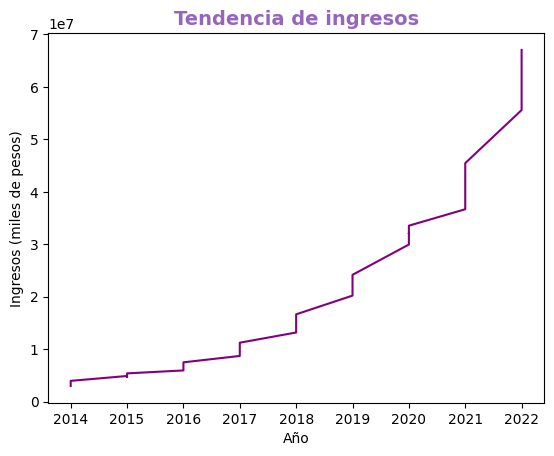

In [10]:
plt.plot(internet_ingresos['Año'],internet_ingresos['Ingresos (miles de pesos)'], color='purple')
plt.title('Tendencia de ingresos', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.show()

Los ingresos muestran una tendencia alcista a lo largo de los años. Con un crecimiento destacable en 2020-2021

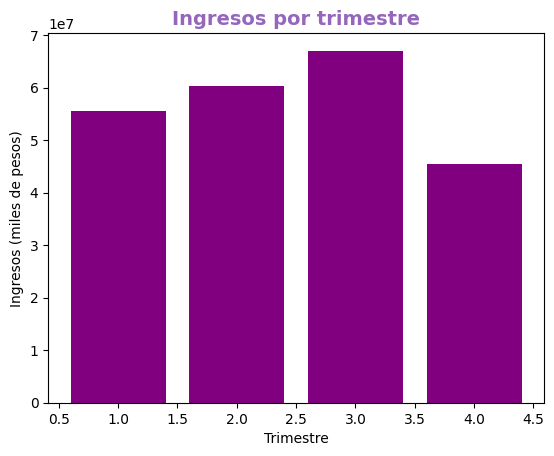

In [11]:
plt.bar(internet_ingresos['Trimestre'], internet_ingresos['Ingresos (miles de pesos)'], color='purple')
plt.title('Ingresos por trimestre', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.show()

In [13]:
internet_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     int64 
 3   Periodo                    35 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [14]:
internet_ingresos.to_csv('internet_ingresos.csv', index=False)

- Penetracion del internet fijo (acceso por cada 100 hogares)

In [15]:
penet_internet= pd.read_csv("./Datos/Internet_Penetracion.csv")
penet_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [16]:
penet_internet.shape

(840, 4)

In [17]:
penet_internet.describe()

,Año,Trimestre
count,840.000000,840.000000
mean,2017.885714,2.457143
std,2.528745,1.105009
min,2014.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [18]:
penet_internet.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [19]:
# Limpio y convierto los valores de la columna 'Accesos...' a tipo numérico
penet_internet['Accesos por cada 100 hogares'] = penet_internet['Accesos por cada 100 hogares'].str.replace(',', '.')
penet_internet['Accesos por cada 100 hogares'] = pd.to_numeric(penet_internet['Accesos por cada 100 hogares'])

In [ ]:
penet_internet.head(20)

: 

<Axes: xlabel='Accesos por cada 100 hogares', ylabel='Count'>

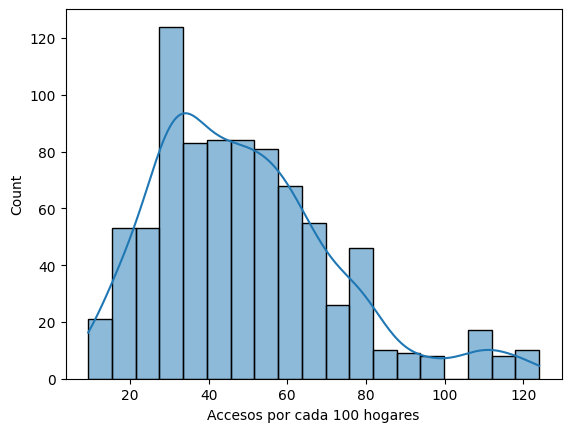

In [21]:
#Visualizamos la forma de la distribucion
sns.histplot(data=penet_internet, x="Accesos por cada 100 hogares", kde=True)

<Axes: xlabel='Año', ylabel='Accesos por cada 100 hogares'>

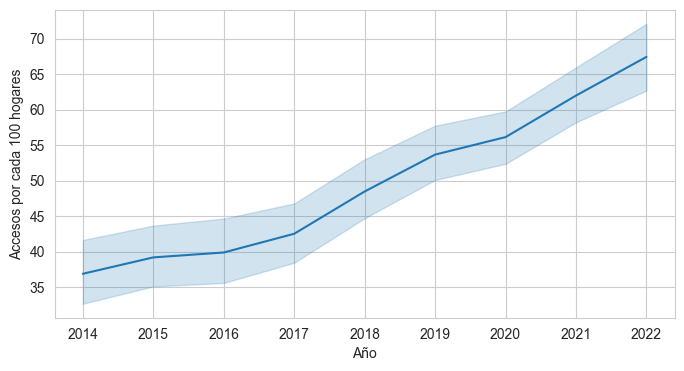

In [151]:
plt.figure(figsize=(8,4))
sns.lineplot(data =penet_internet, x='Año',y='Accesos por cada 100 hogares')

<Axes: xlabel='Accesos por cada 100 hogares', ylabel='Count'>

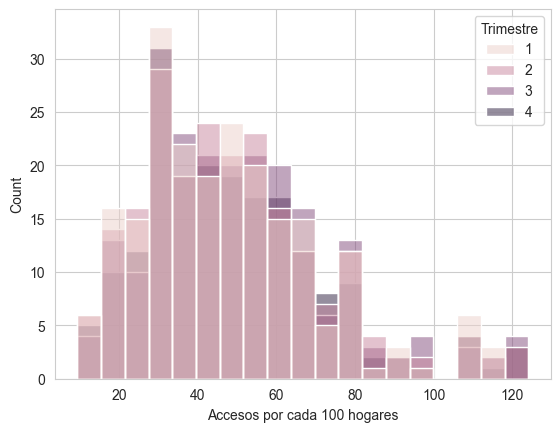

In [150]:
sns.histplot(data=penet_internet, x="Accesos por cada 100 hogares", hue="Trimestre")

In [22]:
#ordenamos descendentemente para obtener las provincias con mas acceso a menos
penet_internet.sort_values(['Accesos por cada 100 hogares'], ascending=False, inplace=True)

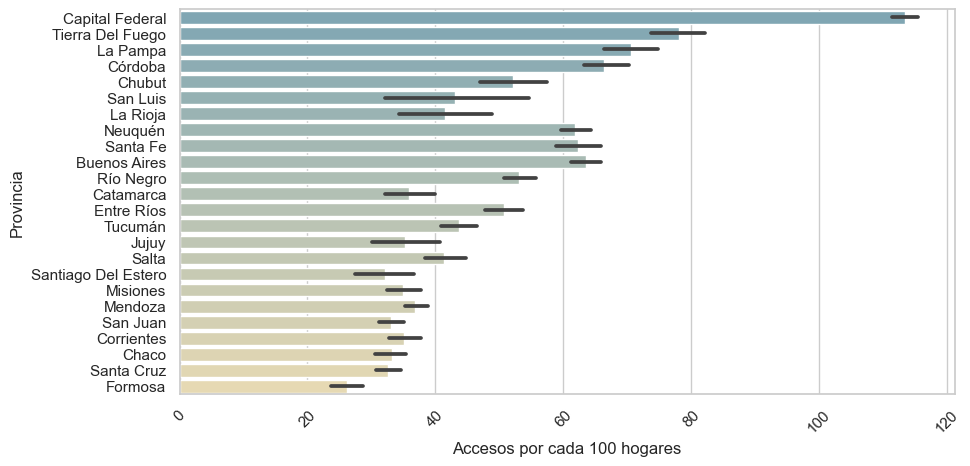

In [180]:
plt.figure(figsize=(10, 5))
sns.barplot(y="Provincia", x="Accesos por cada 100 hogares", data=penet_internet, palette="blend:#7AB,#EDA")
plt.xticks(rotation=45)
plt.show()

Podemos agrupar como provincias con mejor acceso a : Capital Federal, Tierra del Fuego,La Pampa, Cordoba y Buenos Aires.
Se ven oportunidades de crecimiento en Tucuman, Formosa, Santiago del Estero y Catamarca

In [253]:
grp= penet_internet.groupby(by=['Año','Provincia' ])
grp

([<matplotlib.axis.XTick at 0x1ac4e7c7ed0>,
 [Text(201401, 0, '2014'),
  Text(201402, 0, '2014'),
  Text(201403, 0, '2014'),
  Text(201404, 0, '2014'),
  Text(201501, 0, '2015'),
  Text(201502, 0, '2015'),
  Text(201503, 0, '2015'),
  Text(201504, 0, '2015'),
  Text(201601, 0, '2016'),
  Text(201602, 0, '2016'),
  Text(201603, 0, '2016'),
  Text(201604, 0, '2016'),
  Text(201701, 0, '2017'),
  Text(201702, 0, '2017'),
  Text(201703, 0, '2017'),
  Text(201704, 0, '2017'),
  Text(201801, 0, '2018'),
  Text(201802, 0, '2018'),
  Text(201803, 0, '2018'),
  Text(201804, 0, '2018'),
  Text(201901, 0, '2019'),
  Text(201902, 0, '2019'),
  Text(201903, 0, '2019'),
  Text(201904, 0, '2019'),
  Text(202001, 0, '2020'),
  Text(202002, 0, '2020'),
  Text(202003, 0, '2020'),
  Text(202004, 0, '2020'),
  Text(202101, 0, '2021'),
  Text(202102, 0, '2021'),
  Text(202103, 0, '2021'),
  Text(202104, 0, '2021'),
  Text(202201, 0, '2022'),
  Text(202202, 0, '2022'),
  Text(202203, 0, '2022')])

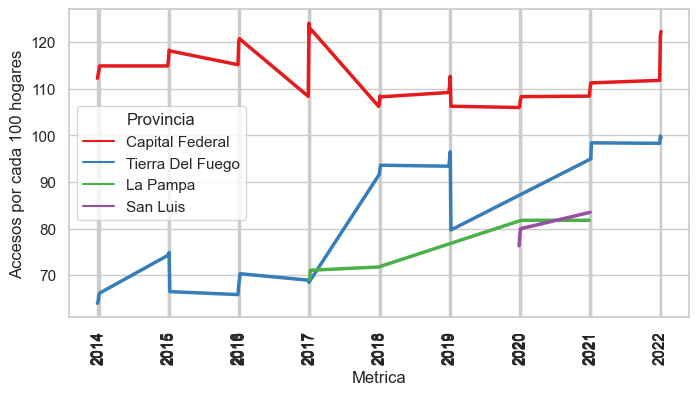

In [169]:

# Calculamos una métrica única para cada periodo de tiempo
penet_internet["Metrica"] = penet_internet["Año"] * 100 + penet_internet["Trimestre"]

# Crear una lista vacía para almacenar los resultados
top_4_provincias = []

# Obtener las 4 provincias con mayor acceso para cada periodo de tiempo
for metrica, group in penet_internet.groupby("Metrica"):
    top_4_provincias.append(group.nlargest(2, "Accesos por cada 100 hogares"))

# Combinar los resultados en un único DataFrame
top_4_provincias = pd.concat(top_4_provincias)

# Generar el gráfico utilizando seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.lineplot(data=top_4_provincias, x="Metrica", y="Accesos por cada 100 hogares", hue="Provincia", palette="Set1", linewidth=2.5)

# Obtener los valores únicos de la métrica para etiquetar el eje x correctamente
metrica_ticks = top_4_provincias["Metrica"].unique()
plt.xticks(metrica_ticks, metrica_ticks // 100, rotation=90)




In [282]:
años= penet_internet.groupby('Año')['Accesos por cada 100 hogares'].sum()

In [291]:
accesos= penet_internet.groupby('Provincia')['Accesos por cada 100 hogares'].sum()

In [297]:
accesos

Provincia
Buenos Aires           2224.32
Capital Federal        3968.28
Catamarca              1256.78
Chaco                  1161.40
Chubut                 1826.55
Corrientes             1229.88
Córdoba                2322.47
Entre Ríos             1777.91
Formosa                 917.52
Jujuy                  1234.66
La Pampa               2471.18
La Rioja               1452.46
Mendoza                1290.18
Misiones               1225.59
Neuquén                2166.79
Río Negro              1860.01
Salta                  1449.96
San Juan               1159.38
San Luis               1505.96
Santa Cruz             1142.23
Santa Fe               2183.72
Santiago Del Estero    1125.26
Tierra Del Fuego       2735.31
Tucumán                1527.43
Name: Accesos por cada 100 hogares, dtype: float64

In [316]:
#sacare el promedio de acceso. El maximo y el minimo con el fin de hacer una comparacion y visualizar la desiguldad en el acceso
promedio= accesos.sum()/len(accesos)
maximo= max(accesos)
minimo=min(accesos)
#print(accesos==3968.28) -Capital Federal
#print(accesos==917.52) -Formosa
print(f'El promedio de acceso a internet a lo largo de los 9 años fue de {promedio.round(2)}, el acceso maximo cada 100 hogares fue de {maximo} perteneciente a Capital Federal y el minimo fue de {minimo} perteneciente a Formosa')

El promedio de acceso a internet a lo largo de los 9 años fue de 1717.3, el acceso maximo cada 100 hogares fue de 3968.28 perteneciente a Capital Federal y el minimo fue de 917.52 perteneciente a Formosa


El promedio de acceso a internet a lo largo de los 9 años fue de 1717.3, el acceso maximo cada 100 hogares fue de 3968.28 perteneciente a Capital Federal y el minimo fue de 917.52 perteneciente a Formosa

In [283]:
años

Año
2014    3541.64
2015    3763.04
2016    3829.42
2017    4082.47
2018    4653.84
2019    5152.00
2020    5388.54
2021    5949.93
2022    4854.35
Name: Accesos por cada 100 hogares, dtype: float64

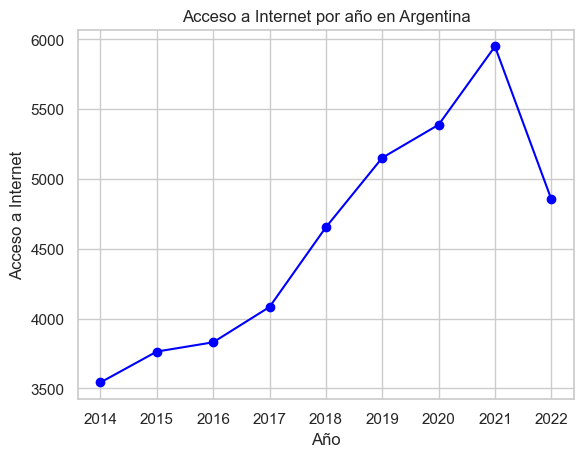

In [284]:

# Datos de acceso a Internet por año
años = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
accesos = [3541.64, 3763.04, 3829.42, 4082.47, 4653.84, 5152.00, 5388.54, 5949.93, 4854.35]

# Creacion
plt.plot(años, accesos, marker='o', linestyle='-', color='blue')


plt.xlabel('Año')
plt.ylabel('Acceso a Internet')
plt.title('Acceso a Internet por año en Argentina')
plt.grid(True)
plt.show()


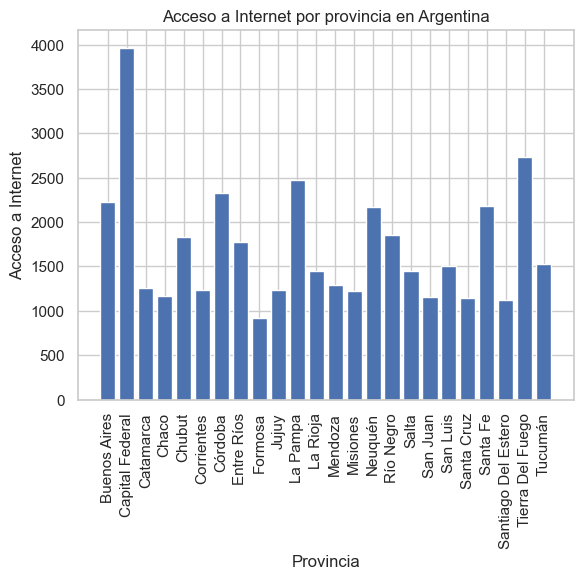

In [285]:


# Datos de acceso a Internet por provincia
provincias = ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Corrientes', 'Córdoba', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán']
accesos = [2224.32, 3968.28, 1256.78, 1161.40, 1826.55, 1229.88, 2322.47, 1777.91, 917.52, 1234.66, 2471.18, 1452.46, 1290.18, 1225.59, 2166.79, 1860.01, 1449.96, 1159.38, 1505.96, 1142.23, 2183.72, 1125.26, 2735.31, 1527.43]

# Crear el gráfico de barras
plt.bar(provincias, accesos)

# Personalizar el gráfico
plt.xlabel('Provincia')
plt.ylabel('Acceso a Internet')
plt.title('Acceso a Internet por provincia en Argentina')
plt.xticks(rotation=90)
plt.grid(True)

# Mostrar el gráfico
plt.show()


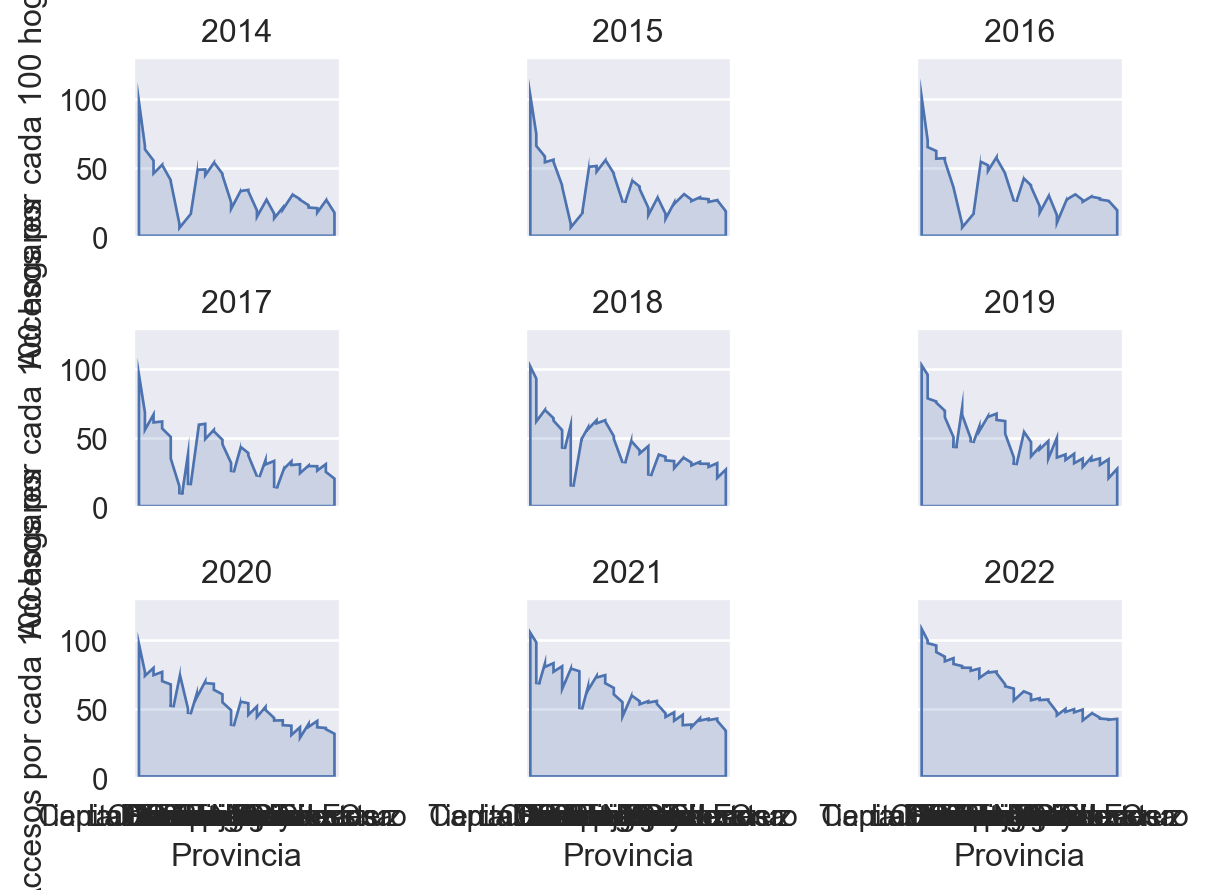

In [321]:
p = so.Plot(penet_internet,"Provincia", "Accesos por cada 100 hogares" ).facet("Año", wrap=3)
p.add(so.Area())

In [23]:
penet_internet.to_csv('penet_internet.csv', index=False)

- Acceso a internet por tecnologia y provincia

In [136]:
acceso_tecn_prov= pd.read_csv("./Datos/Internet_Accesos-por-tecnologia (1).csv")
acceso_tecn_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [137]:
acceso_tecn_prov.shape

(841, 9)

In [138]:
acceso_tecn_prov.describe()#estadisticas descriptivas

,Wireless,Otros
count,840.000000,840.000000
mean,58.571726,102.303848
std,158.016953,207.118151
min,0.000000,1.007000
25%,3.437500,2.934000
50%,8.186500,15.267000
75%,26.024500,47.000000
max,952.000000,987.000000


In [139]:
acceso_tecn_prov.isnull().sum()#1
acceso_tecn_prov.dropna(inplace=True)

In [140]:
acceso_tecn_prov.to_csv('acceso_tecn_prov.csv', index=False)

In [141]:
acceso_tecn_prov.head(5)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [142]:
#debido  a un error cambiamos el tipo
acceso_tecn_prov['ADSL'] = acceso_tecn_prov['ADSL'].astype(str)

In [148]:
acceso_tecn_prov['Total'] = acceso_tecn_prov['Total'].astype(str)

In [149]:
#convertimos a numerico
acceso_tecn_prov['ADSL'] = pd.to_numeric(acceso_tecn_prov['ADSL'].str.replace('.',''))
acceso_tecn_prov['Cablemodem'] = pd.to_numeric(acceso_tecn_prov['Cablemodem'].str.replace('.',''))
acceso_tecn_prov['Fibra óptica'] = pd.to_numeric(acceso_tecn_prov['Fibra óptica'].str.replace('.',''))
acceso_tecn_prov['Total'] = pd.to_numeric(acceso_tecn_prov['Total'].str.replace('.',''))

In [162]:
acceso_tecn_prov['Wireless'] = acceso_tecn_prov['Wireless'].astype(str)
acceso_tecn_prov['Otros'] = acceso_tecn_prov['Otros'].astype(str)

In [163]:

acceso_tecn_prov['Wireless'] = pd.to_numeric(acceso_tecn_prov['Wireless'].str.replace('.',''))
acceso_tecn_prov['Otros'] = pd.to_numeric(acceso_tecn_prov['Otros'].str.replace('.',''))

In [164]:
#total de acceso en el pais de cada tecnologia
print((acceso_tecn_prov['ADSL'].sum()))
print((acceso_tecn_prov['Cablemodem'].sum()))
print((acceso_tecn_prov['Fibra óptica'].sum()))
print((acceso_tecn_prov['Wireless'].sum()))
print((acceso_tecn_prov['Otros'].sum()))

107156124
144291039
25125964
8347432
5547259


(0.0, 100.0, 0.0, 100.0)

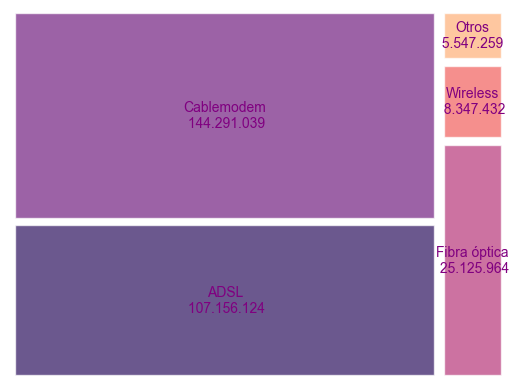

In [174]:
#creamos un treemaps
import squarify

# Datos, etiquetas y colores
values = [107156124, 144291039, 25125964, 8347432, 5547259 ]
labels = ['ADSL\n 107.156.124', 'Cablemodem\n 144.291.039', 'Fibra óptica\n 25.125.964',
          'Wireless\n 8.347.432', 'Otros\n 5.547.259 ',]
#colors = ['#91DCEA', '#64CDCC', '#5FBB68',
#         '#F9D23C', '#F9A729']

# Creo el Treemap
squarify.plot(sizes = values,
              label= labels,
              color = sns.color_palette("magma", 
                                     len(values)), 
              alpha= 0.7,
              pad = 0.05,
              text_kwargs = {'fontsize': 10, 'color': 'purple'})

# Eliminamos ejes
plt.axis("off")



Podemos notar que a nivel nacional la tecnologia Cablemodem es la que predenomina.

-  Accesos a Internet por velocidad

La FCC (Comisión Federal de Comercio) de Estados Unidos  recomienda una velocidad de Internet de 12-25 Mbps para familias (descarga) con varios usuarios de Internet o para la transmisión frecuente o simultánea de datos

In [152]:
int_velocidad=pd.read_csv("./Datos/Internet_Accesos-por-velocidad (1).csv")
int_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [144]:
int_velocidad.shape

(840, 12)

In [145]:
int_velocidad.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,834.000000
mean,2017.885714,2.457143,126.009998,101.790393,71.417265,79.988627,100.758158,32.937064
std,2.528745,1.105009,187.578607,207.396126,140.324223,170.586599,208.683467,128.937905
min,2014.000000,1.000000,1.007000,0.000000,0.000000,0.000000,0.000000,-1.945000
25%,2016.000000,1.000000,10.000000,3.362500,5.357250,4.872000,2.019000,0.000000
50%,2018.000000,2.000000,50.000000,8.788000,20.157000,14.965500,11.251500,0.000000
75%,2020.000000,3.000000,134.000000,84.340500,62.225500,55.093000,64.286250,7.497750
max,2022.000000,4.000000,998.000000,999.000000,917.000000,978.000000,997.000000,923.000000


In [146]:
int_velocidad.isnull().sum()#solo 6 faltantes en 'otros'

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [147]:
int_velocidad.head(2)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679


In [148]:
int_velocidad['Provincia'].astype(str)

0             Buenos Aires
1          Capital Federal
2                Catamarca
3                    Chaco
4                   Chubut
              ...         
835             Santa Cruz
836               Santa Fe
837    Santiago Del Estero
838       Tierra Del Fuego
839                Tucumán
Name: Provincia, Length: 840, dtype: object

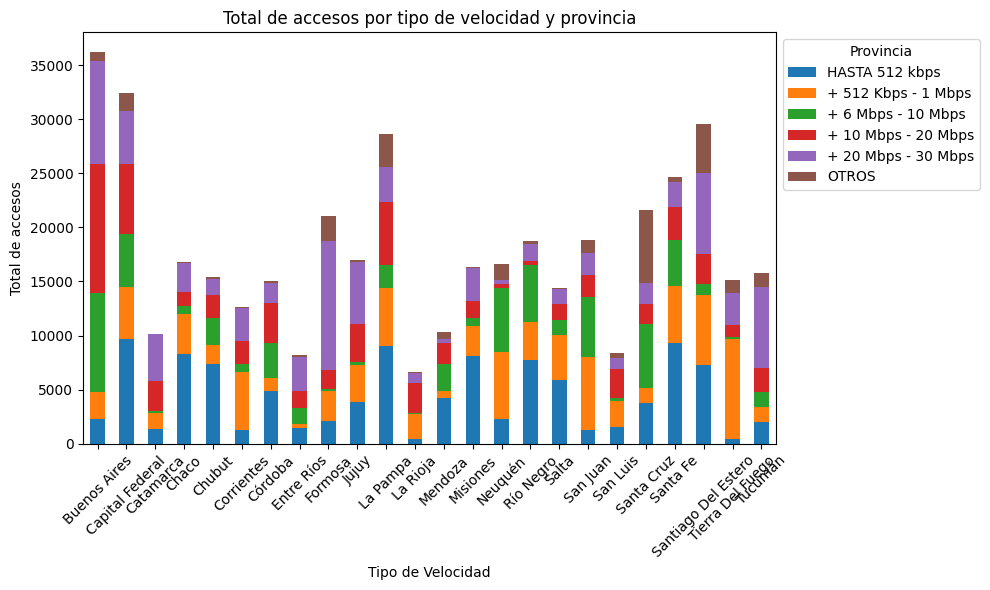

In [150]:
# Seleccionamos las columnas relevantes 
columnas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']
int_velocidad = int_velocidad[['Provincia'] + columnas]

# Agrupamos por provincia y sumamos  las velocidades de acceso
int_velocidad = int_velocidad.groupby('Provincia').sum()



# Crear el gráfico de barras apiladas
ax = int_velocidad.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurar las etiquetas de los ejes
ax.set_xlabel('Tipo de Velocidad')
ax.set_ylabel('Total de accesos')

# Configurar el título del gráfico
ax.set_title('Total de accesos por tipo de velocidad y provincia')

# Mostrar el gráfico
plt.legend(title='Provincia', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [153]:
int_velocidad['+ 30 Mbps'] 

0      3.618.689
1      1.253.105
2         50.298
3         79.390
4         17.563
         ...    
835            0
836          668
837            0
838            0
839            0
Name: + 30 Mbps, Length: 840, dtype: object

In [154]:

int_velocidad['+ 30 Mbps'] = int_velocidad['+ 30 Mbps'].str.replace('.', '')
int_velocidad['+ 30 Mbps'] = pd.to_numeric(int_velocidad['+ 30 Mbps'])

In [155]:
int_velocidad.groupby('Año').sum()

,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
Año,,,,,,,,,,,
2014,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,11141.276,6567.729,2.250.4451.038.26914.09342.10660.392427.84442....,2563.430,11007.826,4525.177,51507,0.000,2.705.9541.331.97225.49366.06068.538589.87365....
2015,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,14550.740,5213.948,2.253.197916.81314.48446.77171.881427.47148.10...,5043.586,10935.304,11132.262,77723,0.000,2.888.2461.350.45026.47186.55378.448625.92985....
2016,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,12443.923,4689.466,2.085.605704.32416.51945.63473.951404.64548.99...,9330.755,4475.550,10110.003,122012,0.000,3.138.5411.266.88527.03288.85480.197637.47388....
2017,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,14396.748,2846.440,1.551.194517.01815.31537.14483.676280.83741.08...,11772.916,8454.981,6800.320,729974,155.145,3.188.3321.584.23829.55896.47193.432700.61193....
2018,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,9333.511,2455.058,1.422.463283.28117.95536.43766.061228.47537.37...,10188.676,13292.452,10609.993,1966724,4870.811,3.636.6061.389.02033.583103.27078.722737.33910...
2019,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,9513.475,9909.747,1.177.446177.0989.94525.89969.405232.78135.055...,4092.699,9526.226,9406.438,7962202,3412.470,3.686.2541.358.10538.311117.90396.102806.68811...
2020,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,12922.365,21703.516,1.109.865160.2108.84324.78288.157214.96331.900...,6554.645,3732.665,13380.518,15505079,5008.861,4.033.2611.379.53052.396139.091130.574902.7011...
2021,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,12099.145,20429.360,352.95047.1336.03818.84563.698184.54828.83056....,6885.712,3117.868,11046.326,20021752,6377.015,4.509.1571.412.11959.090143.745160.308986.7701...
2022,144,Buenos AiresCapital FederalCatamarcaChacoChubu...,9447.215,11688.666,290.31534.3713.10716.78245.707153.32423.42747....,3558.084,2647.575,7625.816,20073859,7645.209,4.721.6681.547.67970.293144.146165.7781.038.66...


In [156]:
df_aux= int_velocidad[['Provincia', 'Año', '+ 30 Mbps']].groupby(['Provincia', 'Año'])['+ 30 Mbps'].sum()#agrupamos por provincia y sumamos el valor del mejor tipo de velocidad

In [157]:
df =df_aux.to_frame()

In [158]:
df

+ 30 Mbps
Provincia    Año            
Buenos Aires 2014      17984
             2015      28312
             2016      52059
             2017     328624
             2018     886426
...                      ...
Tucumán      2018      42892
             2019     110325
             2020     319702
             2021     454064
             2022     438987

[216 rows x 1 columns]

Disparidad en el acceso al mejor tipo de velocidad en 9 años

In [159]:
df['+ 30 Mbps']

Provincia     Año 
Buenos Aires  2014     17984
              2015     28312
              2016     52059
              2017    328624
              2018    886426
                       ...  
Tucumán       2018     42892
              2019    110325
              2020    319702
              2021    454064
              2022    438987
Name: + 30 Mbps, Length: 216, dtype: int64

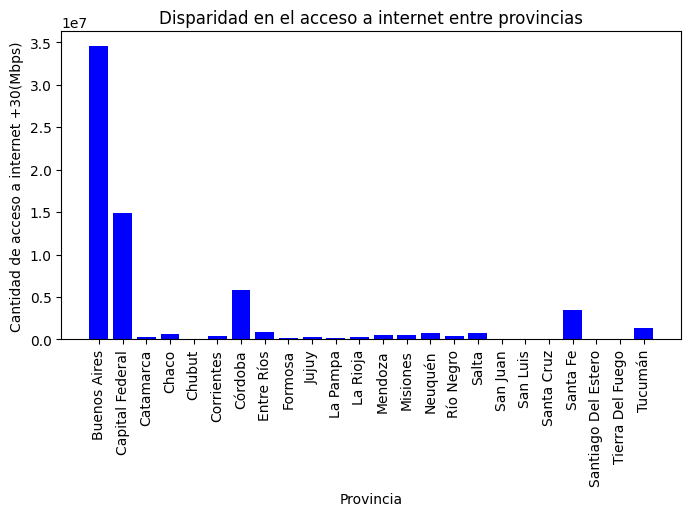

In [160]:
import matplotlib.pyplot as plt

# Datos de las provincias y su velocidad de acceso a internet
provincias = [
    'Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Corrientes',
    'Córdoba', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza',
    'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
    'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'
]
velocidades = [
    34536860, 14929099, 308481, 640712, 59147, 449085, 5792540, 835688, 148652, 303235,
    116062, 299947, 532966, 573966, 789525, 432940, 712604, 59424, 220, 14666,
    3513594, 78065, 12312, 1371042
]

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(provincias, velocidades, color='blue')

# Personalizar el gráfico
plt.title('Disparidad en el acceso a internet entre provincias')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de acceso a internet +30(Mbps)')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


Se seleccionaron aquellos datos donde la velocidad de bajada fue +30 Mbps (mejor velocidad/calidad). Y podemos notar la desigualdad en el pais. La concentracion se encuetra en Buenos Aires y Capital Federal y es casi nulo la presencia de este tipo en el norte del pais

In [161]:
total= df.groupby('Provincia')['+ 30 Mbps'].sum()

In [162]:
#comparacion entre maximo y minimo en 9 años
sorted_df = df.groupby('Provincia')['+ 30 Mbps'].sum().sort_values(ascending=False)
# max= Buenos Aires 34536860
#min = San Luis 220
sorted_df

Provincia
Buenos Aires           34536860
Capital Federal        14929099
Córdoba                 5792540
Santa Fe                3513594
Tucumán                 1371042
Entre Ríos               835688
Neuquén                  789525
Salta                    712604
Chaco                    640712
Misiones                 573966
Mendoza                  532966
Corrientes               449085
Río Negro                432940
Catamarca                308481
Jujuy                    303235
La Rioja                 299947
Formosa                  148652
La Pampa                 116062
Santiago Del Estero       78065
San Juan                  59424
Chubut                    59147
Santa Cruz                14666
Tierra Del Fuego          12312
San Luis                    220
Name: + 30 Mbps, dtype: int64

In [164]:
bs_as= df.loc['Buenos Aires']
san_luis=df.loc['San Luis']
#bs_as = df.query("Provincia == 'Buenos Aires'")
#sns.lineplot(data=bs_as, x="Año", y="+ 30 Mbps")

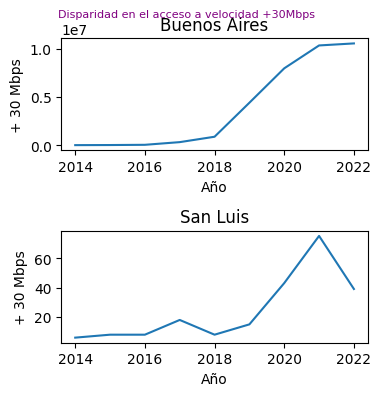

In [187]:


# Filtrar los datos para la provincia de Buenos Aires
bs_as = df.query("Provincia == 'Buenos Aires'")

# Crear una figura y los subplots
fig, ax = plt.subplots(2, 1, figsize=(4, 4))

# Graficar el primer gráfico de líneas
sns.lineplot(data=bs_as, x="Año", y="+ 30 Mbps", ax=ax[0])
ax[0].set_title("Buenos Aires")

# Filtramos datos de San Luis
san_luis = df.query("Provincia == 'San Luis'")

# Graficamos
sns.lineplot(data=san_luis, x="Año", y="+ 30 Mbps", ax=ax[1])
ax[1].set_title("San Luis")

# Ajustamos los espacios entre los subplots
plt.tight_layout()
plt.suptitle("Disparidad en el acceso a velocidad +30Mbps", fontsize=8, color="Purple")


plt.show()


En este grafico se presentan las dos situaciones extrema. El lider en mejor acceso vs el peor, podemos señalar que Buenos Aires estuvo en constante crecimiento en cuanto a cantidad de accesos y en San Luis a cantidad tuvo fluctuaciones es muchisima la diferencia.

In [40]:
int_velocidad.to_csv('tipo_velocidad.csv', index=False)